In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import calendar
import sys
sys.path.append('../')  # Add the parent folder to the Python path

from sql_functions import get_dataframe  # Import the function

main_cities = [
    'New York, NY',
    'Washington, DC',
    'Philadelphia, PA',
]

In [51]:
query_full_time = '''
	SELECT * 
	FROM group3.full_weather
	WHERE city_name IN ('New York, NY', 'Washington, DC', 'Philadelphia, PA')
	AND date >= '2015-12-01'::timestamp
	AND date <= '2017-01-31'::timestamp
	ORDER BY date;
'''

weather_full = get_dataframe(query_full_time)
weather_full.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_full.head()

,date,avg_temp_°C,preciptation_mm,snowdepth_mm,avg_windspeed_kmh,city_name,year,month,day
0,2015-12-01,7.8,21.6,0.0,7.6,"Washington, DC",2015,12,1
1,2015-12-01,8.8,7.4,0.0,17.6,"New York, NY",2015,12,1
2,2015-12-01,10.3,17.8,0.0,11.5,"Philadelphia, PA",2015,12,1
3,2015-12-02,12.6,4.1,0.0,10.1,"Philadelphia, PA",2015,12,2
4,2015-12-02,10.7,5.6,0.0,9.4,"Washington, DC",2015,12,2


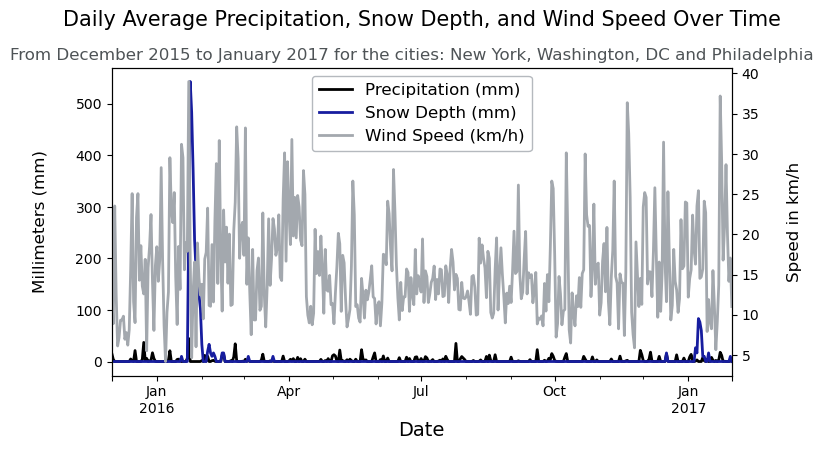

In [115]:
daily_averages = weather_full[['date','avg_temp_°C', 'preciptation_mm', 'snowdepth_mm', 'avg_windspeed_kmh']].groupby('date').mean()


# Plotting the bar chart
plt.figure(figsize=(8, 4))

# Create a subplot with 1 row and 1 column
ax1 = plt.subplot(111)

# Plot the daily averages over time for precipitation
line1 = daily_averages['preciptation_mm'].plot(ax=ax1, label='Precipitation (mm)', color='#000', linewidth=2.0)

# Plot the daily averages over time for snow depth
line2 = daily_averages['snowdepth_mm'].plot(label='Snow Depth (mm)', color='#171d9f', linewidth=2.0)

# Set label for primary y-axis (left side)
ax1.set_ylabel('Millimeters (mm)', fontsize=12, labelpad=20)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Speed in km/h', fontsize=12, labelpad=20)

# Plot the daily averages over time for wind speed on secondary y-axis
line3 = daily_averages['avg_windspeed_kmh'].plot(ax=ax2, label='Wind Speed (km/h)', color='#A3A8AE', linewidth=2.0)

# Set x-axis label
ax1.set_xlabel('Date', fontsize=14)

# Get handles and labels for all lines
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create legend
legend = plt.legend(handles, labels, fontsize='large')

# Set the border around the legend box
legend.get_frame().set_edgecolor('#A3A8AE')
legend.get_frame().set_linewidth(1)

# Set title
plt.suptitle('From December 2015 to January 2017 for the cities: New York, Washington, DC and Philadelphia',color='#4E5356', y=0.93)
plt.title('Daily Average Precipitation, Snow Depth, and Wind Speed Over Time',fontsize=15, pad=30)

# Show the plot
plt.show()

In [118]:
query_event = '''
	SELECT * 
	FROM group3.full_weather
	WHERE date >= '2016-01-22'::timestamp
	AND date <= '2016-01-28'::timestamp
'''

weather_event = get_dataframe(query_event)
weather_event.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_event.describe()

,avg_temp_°C,preciptation_mm,snowdepth_mm,avg_windspeed_kmh,year,month,day
count,49.000000,49.000000,35.000000,49.000000,49.0,49.0,49.000000
mean,7.269388,6.855102,179.142857,14.044898,2016.0,1.0,25.000000
std,7.622724,14.283543,216.283738,8.422986,0.0,0.0,2.020726
min,-3.700000,0.000000,0.000000,3.600000,2016.0,1.0,22.000000
25%,0.400000,0.000000,0.000000,7.600000,2016.0,1.0,23.000000
50%,7.400000,0.000000,100.000000,14.400000,2016.0,1.0,25.000000
75%,11.600000,6.600000,330.000000,18.000000,2016.0,1.0,27.000000
max,24.500000,73.700000,710.000000,40.300000,2016.0,1.0,28.000000


In [125]:
weather_full[(weather_full['year'] == 2016) & (~weather_full['day'].isin([22, 23, 24, 25, 26, 27, 28]))].describe()

,avg_temp_°C,preciptation_mm,snowdepth_mm,avg_windspeed_kmh,year,month,day
count,846.000000,846.000000,846.000000,846.000000,846.0,846.000000,846.000000
mean,14.483097,2.272695,2.151300,15.769622,2016.0,6.517730,13.003546
std,9.518062,5.676933,15.410925,6.493089,0.0,3.453021,8.162622
min,-13.100000,0.000000,0.000000,2.200000,2016.0,1.000000,1.000000
25%,7.100000,0.000000,0.000000,11.200000,2016.0,4.000000,6.000000
50%,14.200000,0.000000,0.000000,14.400000,2016.0,7.000000,12.000000
75%,23.275000,0.800000,0.000000,18.700000,2016.0,10.000000,18.000000
max,32.800000,49.800000,230.000000,39.600000,2016.0,12.000000,31.000000
